# Fitering, groupby, and pivoting in pandas


## 1. Filter rows by column value (Very Important)

In [4]:
# Using illegal drugs dataset. 
# Source: https://raw.githubusercontent.com/p4css/py4css/main/data/drug_156_2.csv

import pandas as pd
drug_df = pd.read_csv('https://raw.githubusercontent.com/p4css/py4css/main/data/drug_156_2.csv')
# drug_df
print(drug_df.columns)
drug_df.head()


Index(['違規產品名稱', '違規廠商名稱或負責人', '處分機關', '處分日期', '處分法條', '違規情節', '刊播日期',
       '刊播媒體類別', '刊播媒體', '查處情形'],
      dtype='object')


違規產品名稱       違規廠商名稱或負責人 處分機關  \
0                                                維他肝  豐怡生化科技股份有限公司/朱O  NaN   
1  現貨澳洲Swisse ULTIBOOST維他命D片calcium vitamin VITAM...          張O雯/張O雯  NaN   
2                                 ✈日本 代購 參天製藥 處方簽點眼液          蘇O涵/蘇O涵  NaN   
3                           ✈日本 代購 TSUMURA 中將湯 24天包裝          蘇O涵/蘇O涵  NaN   
4                              _Salty.shop 日本代購 樂敦小花          曾O嫺/曾O嫺  NaN   

                 處分日期     處分法條      違規情節                刊播日期 刊播媒體類別  \
0  03 31 2022 12:00AM      NaN  廣告內容誇大不實   02 2 2022 12:00AM   廣播電台   
1  01 21 2022 12:00AM      NaN      廣告違規  11 30 2021 12:00AM     網路   
2  01 25 2022 12:00AM      NaN      無照藥商  08 27 2021 12:00AM     網路   
3  01 25 2022 12:00AM      NaN      無照藥商  08 27 2021 12:00AM     網路   
4  02 17 2022 12:00AM  藥事法第27條      無照藥商   12 6 2021 12:00AM     網路   

            刊播媒體  查處情形  
0  噶瑪蘭廣播電台股份有限公司   NaN  
1           蝦皮購物  輔導結案  
2           蝦皮購物   NaN  
3           蝦皮購物  輔導結案  
4           蝦皮購物  處分結案

### 1.1  Detecting patterns in strings by `str.contains()`

[Python | Pandas Series.str.contains() - GeeksforGeeks](https://www.geeksforgeeks.org/python-pandas-series-str-contains/)

Using `str.contains()` to filter rows by detecting patterns in strings. `str.contains()` returns a boolean Series based on whether a pattern or regex is contained within a string of a Series or Index.


In [5]:
# define a pattern to search for
pat = '代購|帶回'

# filter the DataFrame based on whether the '違規產品名稱' column contains the pattern
# `na=False` ensures that NaN values are treated as False
filtered_drug_df = drug_df[drug_df['違規產品名稱'].str.contains(pat=pat, na=False)]
filtered_drug_df.head()

違規產品名稱 違規廠商名稱或負責人 處分機關  \
2                                  ✈日本 代購 參天製藥 處方簽點眼液    蘇O涵/蘇O涵  NaN   
3                            ✈日本 代購 TSUMURA 中將湯 24天包裝    蘇O涵/蘇O涵  NaN   
4                               _Salty.shop 日本代購 樂敦小花    曾O嫺/曾O嫺  NaN   
9   現貨正品 Eve 快速出貨 日本代購 白兔60 藍兔 40 eve 金兔 EVE 兔子 娃娃...    張O恩/張O恩  NaN   
18                          [海外代購]纈草根膠囊-120毫克-240粒-睡眠    江O君/江O君  NaN   

                  處分日期     處分法條  違規情節                刊播日期 刊播媒體類別    刊播媒體  查處情形  
2   01 25 2022 12:00AM      NaN  無照藥商  08 27 2021 12:00AM     網路    蝦皮購物   NaN  
3   01 25 2022 12:00AM      NaN  無照藥商  08 27 2021 12:00AM     網路    蝦皮購物  輔導結案  
4   02 17 2022 12:00AM  藥事法第27條  無照藥商   12 6 2021 12:00AM     網路    蝦皮購物  處分結案  
9    03 4 2022 12:00AM      NaN  無照藥商  12 21 2021 12:00AM     網路  蝦皮拍賣網站  輔導結案  
18  03 15 2022 12:00AM      NaN  無照藥商   08 2 2021 12:00AM     網路    蝦皮購物   NaN

### 1.2 Filtered by arithemetic comparison

https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/

We can filter rows in a DataFrame based on column values using comparison operators like `>`, `<`, `==`, etc. 

In the following example. we will (1) count the number of illegal drugs by "刊播媒體", and then (2) filter the results to show only those with more than 5 records.

In [24]:
# count the number of illegal drugs by "刊播媒體"
media_count = drug_df["刊播媒體"].value_counts()

media_count.pipe(display) # It looks like a dataframe. However, ...
print(type(media_count)) # It's a pandas Series.


# Convert the Series to a DataFrame
media_count_df = media_count.reset_index()
print(type(media_count_df)) # Now it's a DataFrame.
print(media_count_df.columns) # Index(['刊播媒體', 'count'], dtype='object')

# You can rename the columns if needed
# media_count_df.columns = ['刊播媒體', 'count']

刊播媒體
蝦皮購物                         523
露天拍賣                         443
PChome商店街                    164
蝦皮拍賣                         158
露天拍賣網站                       119
                            ... 
臺中群健有線電視                       1
世新有線電視股份有限公司                   1
群健有線電視                         1
金頻道有線電視事業股份有限公司                1
吉隆有線電視股份有限公司、吉隆有線電視股份有限公司      1
Name: count, Length: 420, dtype: int64

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index(['刊播媒體', 'count'], dtype='object')


In [25]:
# Filter the DataFrame to show only rows where the count is greater than 5
# That is, filter high frequency media
media_count_df.loc[media_count_df["count"]>5]

刊播媒體  count
0             蝦皮購物    523
1             露天拍賣    443
2        PChome商店街    164
3             蝦皮拍賣    158
4           露天拍賣網站    119
5           蝦皮拍賣網站     98
6               露天     63
7           奇摩拍賣網站     62
8       Yahoo!奇摩拍賣     60
9             奇摩拍賣     57
10              蝦皮     39
11      YAHOO！奇摩拍賣     31
12              臉書     20
13       YAHOO奇摩拍賣     19
14           YAHOO     18
15  PChome商店街-個人賣場     15
16       商店街個人賣場網站     14
17          蝦皮購物網站     14
18         "PCHOME     13
19      PCHOME個人賣場     13
20           露天拍賣網     12
21    吉隆有線電視股份有限公司     11
22      Yahoo！奇摩拍賣     11
23            旋轉拍賣     10
24        Facebook      9
25      Shopee蝦皮拍賣      9
26        facebook      8
27            雅虎拍賣      8
28             康是美      8
29           蝦皮拍賣網      8
30            露天市集      7
31            平安藥局      7
32             壹週刊      7
33        雅虎奇摩拍賣網站      7
34   新台北有線電視股份有限公司      6
35      PCHOME 商店街      6
36     YAHOO！奇摩拍賣網      6
37         Youtube      6

### 1.3 Filtered by one-of by `.isin()`

https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/

Sometimes we want to filter rows based on whether the column value is in a list of values. We can use the `.isin()` method for this purpose.

In [27]:
options = ['蝦皮購物', '露天拍賣'] 

media_count_df.loc[media_count_df["刊播媒體"].isin(options)]

刊播媒體  count
0  蝦皮購物    523
1  露天拍賣    443

## 2. groupby and pivot (Very Important)

[Reshaping and pivot tables — pandas 1.4.2 documentation (pydata.org)](https://pandas.pydata.org/docs/user_guide/reshaping.html)

### 2.1 groupby multiple factors to one new column

We can use the `groupby()` method to group data by multiple columns and then use the `size()` method to count the occurrences of each group. The `reset_index()` method is used to convert the resulting Series back into a DataFrame.

Imaging we want to know the most common "違規情節" by "刊播媒體", or, inverted, the most common "刊播媒體" by "違規情節". We can use `groupby()` to group the data by both "違規情節" and "刊播媒體", and then count the occurrences of each combination.

But before that, we need to count the total number of records by "刊播媒體" first, and filter in those with high counts (e.g., top 10). Also, we need to count the total number of records by "違規情節" and filter in those with high frequency (e.g., top 10).

In [47]:
# Count the number of illegal drugs by "違規情節"
violation_count = drug_df["違規情節"].value_counts()
violation_count.pipe(display) 

# Select top 10 high frequency violations
top_10_violations = violation_count.nlargest(10)
top_10_violations.pipe(display)

# Count the number of illegal drugs by "刊播媒體"
media_count = drug_df["刊播媒體"].value_counts()
media_count.pipe(display)

# Select top 10 high frequency media
top_10_media = media_count.nlargest(10)
top_10_media.pipe(display)

# Count "違規情節" and "刊播媒體"
count = drug_df.groupby(["違規情節", "刊播媒體"]).size().reset_index(name="n")

# Filter to show only top 10 high frequency violations and media
count = count[count["刊播媒體"].isin(top_10_media.index)]
count = count[count["違規情節"].isin(top_10_violations.index)]
# print the dimension of the filtered DataFrame
print(count.shape) # (76, 3)


違規情節
無照藥商                                                                                                                                                                                                                                                                                                                                     1434
廣告違規                                                                                                                                                                                                                                                                                                                                      248
無違規                                                                                                                                                                                                                                                                                                                                    

違規情節
無照藥商                     1434
廣告違規                      248
無違規                       185
其刊登或宣播之廣告內容與原核准廣告內容不符     134
非藥商刊登或宣播藥物廣告              108
藥品未申請查驗登記                  94
刊播未申請核准之廣告                 85
廣告內容誇大不實                   67
禁藥                         40
廣告內容宣稱誇大療效                 34
Name: count, dtype: int64

刊播媒體
蝦皮購物                         523
露天拍賣                         443
PChome商店街                    164
蝦皮拍賣                         158
露天拍賣網站                       119
                            ... 
臺中群健有線電視                       1
世新有線電視股份有限公司                   1
群健有線電視                         1
金頻道有線電視事業股份有限公司                1
吉隆有線電視股份有限公司、吉隆有線電視股份有限公司      1
Name: count, Length: 420, dtype: int64

刊播媒體
蝦皮購物          523
露天拍賣          443
PChome商店街     164
蝦皮拍賣          158
露天拍賣網站        119
蝦皮拍賣網站         98
露天             63
奇摩拍賣網站         62
Yahoo!奇摩拍賣     60
奇摩拍賣           57
Name: count, dtype: int64

(76, 3)


### 2.2 Pivoting count to wide format

Sometimes we want to pivot a DataFrame from long format to wide format. We can use the `pivot()` method for this purpose. The purpose of pivoting is to make the DataFrame easier to read and analyze.

In [48]:
# Pivoting count to wide format
pivot_count = count.pivot(index='違規情節', columns='刊播媒體', values='n').fillna(0)
pivot_count

刊播媒體          PChome商店街  Yahoo!奇摩拍賣  奇摩拍賣  奇摩拍賣網站  蝦皮拍賣  蝦皮拍賣網站   蝦皮購物    露天  \
違規情節                                                                           
刊播未申請核准之廣告          2.0         3.0   0.0     0.0   7.0     1.0    2.0   6.0   
廣告內容宣稱誇大療效          2.0         3.0   0.0     0.0   3.0     0.0    8.0   0.0   
廣告內容誇大不實            0.0         1.0   1.0     1.0   6.0     3.0    7.0   2.0   
廣告違規                7.0        11.0   6.0     1.0  22.0     2.0   44.0   2.0   
無照藥商              121.0        23.0  26.0    28.0  78.0    61.0  366.0  25.0   
無違規                 2.0        11.0   5.0     4.0   9.0     8.0   13.0   7.0   
禁藥                  0.0         0.0   4.0     1.0   5.0     0.0    6.0   1.0   
藥品未申請查驗登記           2.0         1.0   3.0     5.0   8.0     7.0    5.0   2.0   
非藥商刊登或宣播藥物廣告        4.0         0.0   1.0     4.0  10.0     5.0   21.0   3.0   

刊播媒體           露天拍賣  露天拍賣網站  
違規情節                         
刊播未申請核准之廣告     18.0     0.0  
廣告內容宣稱誇大療效      3.0     0.0  
廣告內容誇大不實        8.0     0.0  
廣告違規           25.0     1.0  
無照藥商          173.0    67.0  
無違規            60.0    11.0  
禁藥              8.0     5.0  
藥品未申請查驗登記      14.0    10.0  
非藥商刊登或宣播藥物廣告   19.0     7.0

## 3. Plotting

In [50]:
pat1 = '代購|帶回'
pat2 = '蝦皮|露天|拍賣|YAHOO|商店街'
filtered_drug_df = drug_df.loc[drug_df['違規產品名稱'].str.contains(pat=pat1, na=False) & 
                               drug_df['刊播媒體'].str.contains(pat=pat2, na=False)]
filtered_drug_df.head()

違規產品名稱 違規廠商名稱或負責人 處分機關  \
2                                  ✈日本 代購 參天製藥 處方簽點眼液    蘇O涵/蘇O涵  NaN   
3                            ✈日本 代購 TSUMURA 中將湯 24天包裝    蘇O涵/蘇O涵  NaN   
4                               _Salty.shop 日本代購 樂敦小花    曾O嫺/曾O嫺  NaN   
9   現貨正品 Eve 快速出貨 日本代購 白兔60 藍兔 40 eve 金兔 EVE 兔子 娃娃...    張O恩/張O恩  NaN   
18                          [海外代購]纈草根膠囊-120毫克-240粒-睡眠    江O君/江O君  NaN   

                  處分日期     處分法條  違規情節                刊播日期 刊播媒體類別    刊播媒體  查處情形  
2   01 25 2022 12:00AM      NaN  無照藥商  08 27 2021 12:00AM     網路    蝦皮購物   NaN  
3   01 25 2022 12:00AM      NaN  無照藥商  08 27 2021 12:00AM     網路    蝦皮購物  輔導結案  
4   02 17 2022 12:00AM  藥事法第27條  無照藥商   12 6 2021 12:00AM     網路    蝦皮購物  處分結案  
9    03 4 2022 12:00AM      NaN  無照藥商  12 21 2021 12:00AM     網路  蝦皮拍賣網站  輔導結案  
18  03 15 2022 12:00AM      NaN  無照藥商   08 2 2021 12:00AM     網路    蝦皮購物   NaN

In [53]:
# Count the number of illegal drugs by "刊播媒體"
toplot = filtered_drug_df['刊播媒體'].value_counts().reset_index(name = "n").rename(columns={"index": "media"})

### 3.1 About the matplotlib resolution

* change font type: `matplotlib.rcParams['font.family'] = ['Heiti TC']`


* https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
* Best result: `plt.savefig('filename.pdf')`
* To png: `plt.savefig('filename.png', dpi=300)`

Adjust resolution
* For saving the graph: `matplotlib.rcParams['savefig.dpi'] = 300`
* For displaying the graph when you use plt.show(): `matplotlib.rcParams["figure.dpi"] = 100`



### 3.2 Plot with Chinese font

https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb

```python
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
```


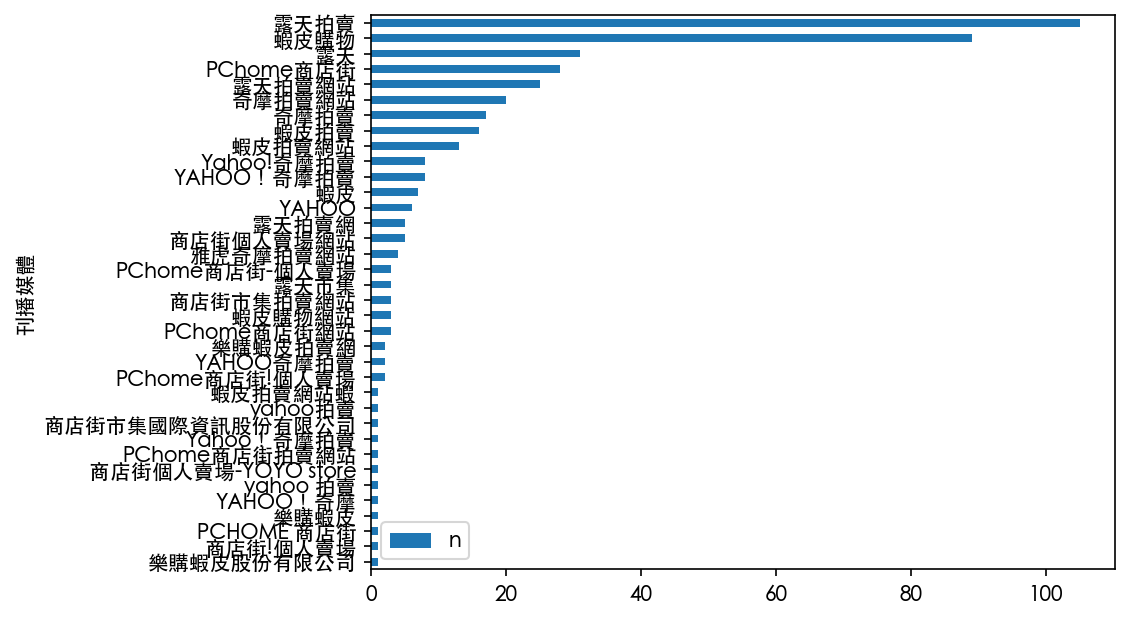

In [55]:

# Plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150 # Set the resolution of the figure
matplotlib.rcParams['font.family'] = ['Heiti TC'] # Set the font to a Chinese font available on your system

toplot.plot.barh(x="刊播媒體").invert_yaxis() # Invert y axis to have the highest bar on top